In [1]:
import sklearn
import tensorflow as tf

In [2]:
print("Sklearn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)

Sklearn version: 1.3.2
TensorFlow version: 2.14.1


In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Perceptron

In [4]:
# Simple example using the perceptron class from sklearn

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris Setosa

perceptron_clf = Perceptron(random_state=42)
perceptron_clf.fit(X, y)

X_new = np.array([[1.5, 0.2], [5.5, 1.8]])
y_pred = perceptron_clf.predict(X_new)
y_pred

array([ True, False])

# Regression MLPs

In [5]:
# Simple example of regression using an MLP on California Housing Data

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [6]:
# Load data
housing = fetch_california_housing()


# Split in train, test and val (2 splits)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, random_state=42
)

# Model
mlp_reg = MLPRegressor(
    hidden_layer_sizes=[50, 50, 50],
    random_state=42
)

In [7]:
# Pipeline
pipeline = make_pipeline(
    StandardScaler(),
    mlp_reg
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)

In [8]:
rmse

0.5053326657968626

# Classification MLPs

# MLPs with Keras

## Image Classifier Using the Sequential API

In [9]:
# Using Keras and Fashion MNIST dataset

import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_val, y_train_val), (X_test, y_test) = fashion_mnist
val_size = 5000
X_train, X_val = X_train_val[:-val_size], X_train_val[-val_size:]
y_train, y_val = y_train_val[:-val_size], y_train_val[-val_size:]

In [10]:
X_train.shape, X_train.dtype

((55000, 28, 28), dtype('uint8'))

In [11]:
# 'Normalizing' pixel intensity, [0, 255] -> [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [12]:
# Target is the class label ID (0-9)
# The corresponding labels are:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Ankle boot')

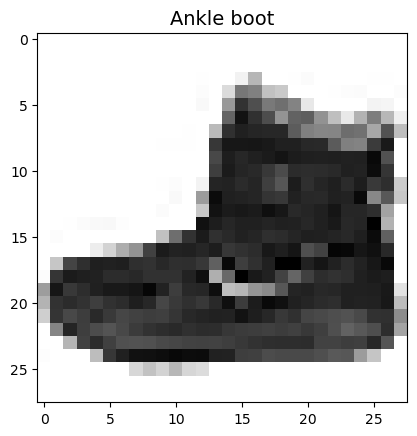

In [13]:
# Quick visualization
import matplotlib.pyplot as plt

idx = 0
plt.imshow(X_train[idx], cmap='binary')
plt.title(class_names[y_train[idx]])

### Creating the Model Using the Sequential API 

In [14]:
# random seed for reproducibility
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [15]:
# Model info
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


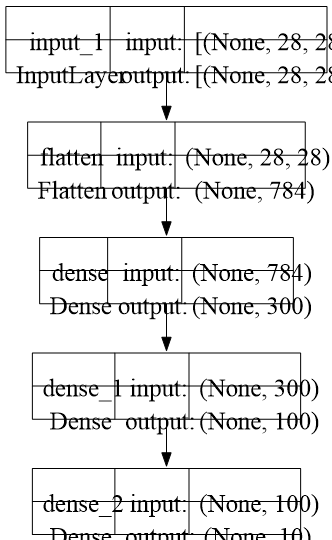

In [16]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [17]:
model.layers

In [18]:
hidden_layer = model.layers[1]
hidden_layer.name, hidden_layer.input_shape, hidden_layer.output_shape

('dense', (None, 784), (None, 300))

### Compile the Model

In [19]:
# Compiling the model to set the loss function, optimizer, and metrics
model.compile(
    loss='sparse_categorical_crossentropy',
    # stochastic gradient descent
    optimizer='sgd',
    metrics=['accuracy']
)

In [20]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7233 - accuracy: 0.7641 - val_loss: 0.5059 - val_accuracy: 0.8260
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4873 - accuracy: 0.8307 - val_loss: 0.4628 - val_accuracy: 0.8330
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4400 - accuracy: 0.8455 - val_loss: 0.4210 - val_accuracy: 0.8550
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4154 - accuracy: 0.8543 - val_loss: 0.3968 - val_accuracy: 0.8618
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3949 - accuracy: 0.8608 - val_loss: 0.3901 - val_accuracy: 0.8620
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3788 - accuracy: 0.8660 - val_loss: 0.3955 - val_accuracy: 0.8596
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3664 - accuracy: 0.8700 - val_loss: 0.3722 - val_accur

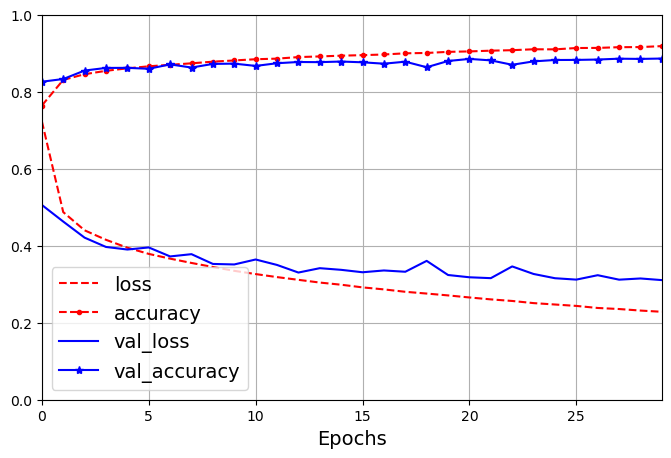

In [21]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=(0, 29), ylim=(0, 1), grid=True, xlabel='Epochs', style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3245 - accuracy: 0.8848


[0.3245452046394348, 0.8848000168800354]

## Building a Regression MLP Using the Sequential API

In [23]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [24]:
# Set the random seed for repro
tf.random.set_seed(42)

# We need a normalization layer
# It acts like StandardScaler (WARNING! - It needs to be fitted [using adapt method] before fitting the model)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

# Define the model 
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
# Choose the optimizer
# learning rate is a VERY important Hyperparameter
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Compile the model
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

# Fit the normalization layer
norm_layer.adapt(X_train)

# Fit the model
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 4s 5ms/step - loss: 0.7604 - root_mean_squared_error: 0.8720 - val_loss: 0.3718 - val_root_mean_squared_error: 0.6097
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3763 - root_mean_squared_error: 0.6134 - val_loss: 2.3865 - val_root_mean_squared_error: 1.5448
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3764 - root_mean_squared_error: 0.6135 - val_loss: 0.4399 - val_root_mean_squared_error: 0.6633
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3429 - root_mean_squared_error: 0.5856 - val_loss: 0.3210 - val_root_mean_squared_error: 0.5665
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3309 - root_mean_squared_error: 0.5752 - val_loss: 0.8110 - val_root_mean_squared_error: 0.9006
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3257 - root_mean_squared_error: 0.5707 - val_loss: 1.1919 - val_

In [25]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 161ms/step


In [26]:
rmse_test

0.5296763181686401

In [27]:
y_pred, y_test[:3]

(array([[0.445819 ],
        [1.1496857],
        [4.815292 ]], dtype=float32),
 array([0.477  , 0.458  , 5.00001]))

## Building Complex Models Using the Functional API

Sequential NNs are usefull but limit the topology of the NN. We can explore more complex NNs like a [a Wide & Deep
neural network]([https://](https://research.google/pubs/wide-deep-learning-for-recommender-systems/))

In [28]:
# Reset name counters and repro
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [29]:
# Define all the layers
normalization_layer = tf.keras.layers.Normalization()
hidden_layer_1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer_2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

In [30]:
# 'Link' the layers
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden_1 = hidden_layer_1(normalized)
hidden_2 = hidden_layer_2(hidden_1)
concat = concat_layer([normalized, hidden_2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 normalization (Normalizati  (None, 8)                    17        ['input_1[0][0]']             
 on)                                                                                              
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['normalization[0][0]']       
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']           

In [32]:
# Model compilation (+ previous steps)
learning_rate = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model
model.compile(loss='mse', optimizer=optimizer, metrics=["RootMeanSquaredError"])

# 'Fit' normalization layer BEFORE model training
normalization_layer.adapt(X_train)

history = model.fit(
    X_train, y_train, 
    validation_data=(X_valid, y_valid), 
    epochs=20, batch_size=32)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.1320 - root_mean_squared_error: 1.0640 - val_loss: 1.0845 - val_root_mean_squared_error: 1.0414
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4624 - root_mean_squared_error: 0.6800 - val_loss: 0.5503 - val_root_mean_squared_error: 0.7418
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4020 - root_mean_squared_error: 0.6341 - val_loss: 1.0616 - val_root_mean_squared_error: 1.0303
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3853 - root_mean_squared_error: 0.6207 - val_loss: 2.3311 - val_root_mean_squared_error: 1.5268
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3721 - root_mean_squared_error: 0.6100 - val_loss: 3.2931 - val_root_mean_squared_error: 1.8147
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3872 - root_mean_squared_error: 0.6223 - val_loss: 4.5622 - val_

In [33]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.3068 - root_mean_squared_error: 0.5539


[0.30675333738327026, 0.5538531541824341]

### Multiple inputs

Using multiple inputs we can choose different 'paths' for different features. Using the Deep and Wide model. 
For example: 
- 'Wide' input: Features 0 to 4 
- 'Deep' input: Features 2 to 7

In [35]:
# Reset
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [42]:
# Define the layers

# Input layer
input_wide = tf.keras.Input(shape=[5], name='wide_input') # 0 to 4 (inc) = 5
input_deep = tf.keras.Input(shape=[6], name='deep_input') # 2 to 7 (inc) = 6

# Normalization layers
norm_layer_wide = tf.keras.layers.Normalization()
normalization_wide = norm_layer_wide(input_wide)

norm_layer_deep = tf.keras.layers.Normalization()
normalization_deep = norm_layer_deep(input_deep)

# Hidden layers
hidden_1 = tf.keras.layers.Dense(30, activation="relu")(normalization_deep)
hidden_2 = tf.keras.layers.Dense(30, activation="relu")(hidden_1)

# Concatenate 
concat = tf.keras.layers.concatenate([normalization_wide, hidden_2])

# Output layer
output = tf.keras.layers.Dense(1)(concat)


# Model
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [44]:
# Optimizer
eta = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=eta)

# Compile
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])

# We have two inputs so we need to manipulate the data accordingly
# Wide input --> features 0 to 4
# Deep input --> features 2 to 7 (end)
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]

# As an example, let's choose the first sample from the test set
example_wide = X_test_wide[:3]
example_deep = X_test_deep[:3]

# Adapt the normalization layer BEFORE fitting the model
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

# Fit the model
history = model.fit(
    [X_train_wide, X_train_deep], y_train,
    validation_data=([X_valid_wide, X_valid_deep], y_valid),
    epochs=20
)

mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((example_wide, example_deep))

print(f"Predicted: {y_pred}")
print(f"Actual: {y_test[:3]}")

Epoch 1/20
363/363 [==============================] - 4s 6ms/step - loss: 1.2177 - root_mean_squared_error: 1.1035 - val_loss: 1.1134 - val_root_mean_squared_error: 1.0552
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5497 - root_mean_squared_error: 0.7414 - val_loss: 0.6982 - val_root_mean_squared_error: 0.8356
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4567 - root_mean_squared_error: 0.6758 - val_loss: 0.4267 - val_root_mean_squared_error: 0.6532
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4152 - root_mean_squared_error: 0.6444 - val_loss: 0.4244 - val_root_mean_squared_error: 0.6514
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3922 - root_mean_squared_error: 0.6262 - val_loss: 0.3774 - val_root_mean_squared_error: 0.6144
Epoch 6/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3765 - root_mean_squared_error: 0.6136 - val_loss: 0.4909 - val_

### Multiple Outputs as a Regularization Techniqiue

In [45]:
# 'Forcing' the model to output something out of the 'Deep' path to not only rely on the whole NN

In [80]:
# Reset
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [81]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]

In [84]:
# Inputs
input_wide = tf.keras.layers.Input(shape=(5,))  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=(6,))  # features 2 to 7

# Normalization layers
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

# Hidden layers
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

# Concatenation layer
concat = tf.keras.layers.concatenate([norm_wide, hidden2])

# Output layers
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2) # Auxiliary output for regularization purposes

# Model
model = tf.keras.Model(
    inputs=[input_wide, input_deep], 
    outputs=[output, aux_output]
)

In [85]:
# Optimizer 
eta = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=eta)

loss_funcs = ('mse', 'mse')  # Loss functions for the main and auxiliary outputs

# Weigths for the loss function
# The model outputs the sum of the loss functions, we can weigths them to regularize more or less
loss_weights = (0.9, 0.1) 

# Additional metrics (one for each output)
metrics = ["RootMeanSquaredError"]

# Compile the model
model.compile(
    optimizer=optimizer,
    loss=loss_funcs,
    loss_weights=loss_weights,
    metrics=metrics
    )

In [88]:
# Adapt normalization layers BEFORE fitting the model
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

# We need a target for each output, in this case, it's the same one, we simply pass it twice inside a tuple
history = model.fit(
    (X_train_wide, X_train_deep), 
    (y_train, y_train),
    epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 3s 7ms/step - loss: 0.5182 - dense_6_loss: 0.4885 - dense_7_loss: 0.7860 - dense_6_root_mean_squared_error: 0.6989 - dense_7_root_mean_squared_error: 0.8865 - val_loss: 0.5234 - val_dense_6_loss: 0.4379 - val_dense_7_loss: 1.2933 - val_dense_6_root_mean_squared_error: 0.6617 - val_dense_7_root_mean_squared_error: 1.1372
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4434 - dense_6_loss: 0.4232 - dense_7_loss: 0.6257 - dense_6_root_mean_squared_error: 0.6505 - dense_7_root_mean_squared_error: 0.7910 - val_loss: 0.5698 - val_dense_6_loss: 0.5552 - val_dense_7_loss: 0.7014 - val_dense_6_root_mean_squared_error: 0.7451 - val_dense_7_root_mean_squared_error: 0.8375
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4218 - dense_6_loss: 0.4058 - dense_7_loss: 0.5652 - dense_6_root_mean_squared_error: 0.6371 - dense_7_root_mean_squared_error: 0.7518 - val_loss: 0.4196 - val_dense_6_loss

In [89]:
# Aux cell because I was getting an error:
# ValueError: Data cardinality is ambiguous:
#       x sizes: 3870, 3870
#       y sizes: 5000, 5000

print("X_train_wide:", X_train_wide.shape)
print("X_train_deep:", X_train_deep.shape)
print("y_train:", y_train.shape)
print("X_valid_wide:", X_valid_wide.shape)
print("X_valid_deep:", X_valid_deep.shape)
print("y_val:", y_val.shape)

# I was using y_val instead of y_valid
# I need to be more consistent in naming conventions on long notebooks

X_train_wide: (11610, 5)
X_train_deep: (11610, 6)
y_train: (11610,)
X_valid_wide: (3870, 5)
X_valid_deep: (3870, 6)
y_val: (5000,)


In [ ]:
# Evaluate the model
eval_results = model.evaluate(
    (X_test_wide, X_test_deep), 
    (y_test, y_test)
)

eval_results
# Total (weighted) loss, loss wide, loss deep, rmse wide, rmse deep

162/162 [==============================] - 1s 5ms/step - loss: 0.3449 - dense_6_loss: 0.3389 - dense_7_loss: 0.3988 - dense_6_root_mean_squared_error: 0.5821 - dense_7_root_mean_squared_error: 0.6315


[0.34486764669418335,
 0.3388745188713074,
 0.39880630373954773,
 0.5821292996406555,
 0.6315111517906189]

In [91]:
y_pred_tuple = model.predict((example_wide, example_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))
y_pred

1/1 [==============================] - 0s 239ms/step


{'dense_6': array([[0.25465155],
        [1.4372262 ],
        [3.4972055 ]], dtype=float32),
 'dense_7': array([[0.26465392],
        [1.493619  ],
        [3.3944683 ]], dtype=float32)}

## Using the Subclassing API to Build Dynamic Models